In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dnda_fdf(dfs0, dfs1, direction='x'):
    '''
    d_nu_d_A2 wrapper for easy calculations from two DataFrame raws
    '''
    cname = 'nu_x' if direction=='x' else 'z'
    
    nu0 = dfs0[cname]
    nu1 = dfs1[cname]
    A0  = dfs0['A,mm']  #TODO: Replace with .coord analysis later
    A1  = dfs1['A,mm']
    
    return d_nu_d_A2(nu0, A0, nu1, A1)

In [3]:
def d_nu_d_A2(nu0, A0, nu1, A1):
    try:
        dnda = (nu1 - nu0) / (A1 - A0)**2
    except:
        print("amplitudes are equal")
        dnda = 0
    return dnda

In [6]:
df = pd.read_csv('../../measurements/28012022/spectroscope_logs/2022_01_28T22_04_30__098000__pic04.coord', sep=' ')

In [7]:
df

t         x         z          i
0        1.0  1.221210  1.102971  16.569221
1        2.0  1.206338  1.069786  16.604761
2        3.0  1.195748  1.088460  16.652569
3        4.0  1.192745  1.083742  16.588158
4        5.0  1.219052  1.100933  16.605968
...      ...       ...       ...        ...
8184  8185.0  1.202935  1.097167  16.643492
8185  8186.0  1.191698  1.082743  16.606529
8186  8187.0  1.189370  1.111135  16.626879
8187  8188.0  1.189370  1.111135  16.626879
8188  8189.0  1.202935  1.097167  16.643492

[8189 rows x 4 columns]

In [39]:
import numpy as np
from scipy.optimize import curve_fit

x = df.loc[33:, 'x']
t = df.loc[33:, 't']

def fit_func(t, A, omega, tau, phi):
    return A*np.exp(-t/tau)*np.sin(omega*t + phi)

params = curve_fit(fit_func, t, x)

A, omega, tau, phi = params[0]
A, omega, tau, phi

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(1.0, 1.0, 1.0, 1.0)

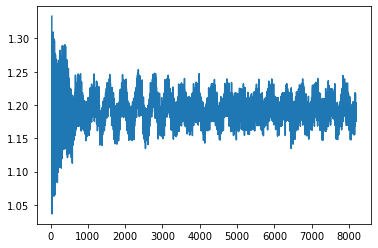

In [40]:
plt.plot(t, x)

In [24]:
dnda_fdf(df.iloc[0], df.iloc[1])

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


-inf

In [6]:
df = pd.read_csv('../../measurements/28012022/freq_grid.dat', sep=' ')
df

nu_x     nu_z     time  G4_PKS  A,mm  \
0   0.18666  0.18564     0:19   13000   5.0   
1   0.18593  0.18597     0:28   13000   5.0   
2   0.18823  0.18821     0:34   13000   NaN   
3   0.20038  0.20023     1:12   10000   4.0   
4   0.20210        -     1:16   13000   5.0   
5   0.19813        -     1:18   12500   NaN   
6   0.24621  0.24597     1:39   12500   4.0   
7   0.24782        -     1:41   12000   3.0   
8   0.24411        -     1:44   12000   3.5   
9   0.24211        -     1:46    2000   NaN   
10  0.19958  0.19958     2:01   12000   3.5   
11  0.19975  0.19988     2:03    8000   0.4   
12  0.20066        -     2:07    8000   0.3   
13  0.20049        -     2:08   12000   3.5   
14  0.20445        -     2:10    8000   NaN   
15  0.20440        -  2:10:58   12000   NaN   
16  0.19312        -     2:19    8000   NaN   
17  0.19281        -     2:20   13000   5.0   
18  0.18614        -     2:28    8000   NaN   
19  0.18599        -     2:29   13500   6.0   
20  0.17364        -     2:32    8000   NaN   
21  0.17182  0.17637     2:33   14000   6.5   
22  0.17940  0.17942     2:37    8000   NaN   
23  0.17966  0.17968     2:40   18000   6.5   
24  0.18201        -     2:41    8000   NaN   
25  0.18179        -     2:43   15000   6.5   
26  0.17888        -     2:57    8000   NaN   
27  0.17812        -     3:04   15000   6.0   
28  0.16684  0.16647     3:30    8000   NaN   
29  0.16592  0.16593     3:32   14500   5.0   
30  0.16790        -     3:34   14500   6.0   
31  0.16821        -     3:36    8000   NaN   
32  0.16975        -     3:39    8000   NaN   
33  0.16911        -     3:40   14500   5.5   
34  0.16317        -     3:43    8000   NaN   
35  0.16039        -     3:44   15000   6.0   
36  0.16099        -     3:46    8000   NaN   
37  0.15883        -  3:46:59   15000   6.0   
38  0.12344        -     3:57    8000   NaN   
39  0.12476  0.12466     3:59   15000   6.0   
40  0.12527  0.12525     4:01   14700   5.5   
41  0.12660  0.12287     4:02    8000   NaN   
42  0.12955  0.12958     4:03    8000   NaN   
43  0.12761  0.12789     4:04   14500   6.0   
44  0.12195  0.12772     4:06    8000   NaN   
45  0.11700  0.12389     4:08   14700   6.0   
46  0.11983        -     4:10    8000   NaN   
47  0.11309        -     4:10   14700   5.5   
48  0.09718  0.10387     4:22    8000   NaN   
49  0.09714  0.10025     4:25   14300   6.0   
50  0.10442  0.09659     4:30    8000   NaN   
51  0.10049  0.09662     4:32   13800   NaN   
52  0.10600  0.09586     4:33    8000   NaN   
53  0.10320        -     4:34   13700   5.0   
54  0.09461  0.10433     4:37    8000   NaN   
55  0.08687  0.09733     4:38   13800   5.0   
56  0.09241  0.11542     4:40    8000   NaN   
57  0.08725  0.10254     4:41   13800   4.0   

                                             Comments  
0                                                 NaN  
1                                                 NaN  
2              Удар_слаб,_не_подходит_для_изучения_ДА  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                                                NaN  
17                                                NaN  
18                                                NaN  
19                                                NaN  
20                                                NaN  
2

In [12]:
df.iloc[1]

nu_x        0.18593
nu_z        0.18597
time           0:28
G4_PKS        13000
A,mm              5
Comments        NaN
Name: 1, dtype: object

In [20]:
dnda_fdf(df.iloc[0], df.iloc[1])

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


-inf